# Exploring generations

In [1]:
# improts
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import re
from pathlib import Path
from glob import glob
import pickle
import shutil
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
import py3Dmol

# For highlight colors
from matplotlib.colors import ColorConverter

from ipywidgets import interact,fixed,IntSlider

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


#IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 500,500
IPythonConsole.drawOptions.addAtomIndices = True

templates = Path('../templates/')
generation_path = Path('~').expanduser()/'generation_correct_scoring'

font = {'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)


In [2]:
def draw_generation(
    mols,
    width=800,
    height=600,
    Hs=False,
    confId=-1,
    multipleConfs=False,
    atomlabel=False,
    hit_ats=None,
):
    try:
        p = py3Dmol.view(width=width, height=height)
        if type(mols) is not list:
            mols = [mols]
        for mol in mols:
            if multipleConfs:
                for conf in mol.GetConformers():
                    mb = Chem.MolToMolBlock(mol, confId=conf.GetId())
                    p.addModel(mb, "sdf")
            else:
                if type(mol) is str:
                    if os.path.splitext(mol)[-1] == ".xyz":
                        xyz_f = open(mol)
                        line = xyz_f.read()
                        xyz_f.close()
                        p.addModel(line, "xyz")
                else:
                    mb = Chem.MolToMolBlock(mol, confId=confId)
                    p.addModel(mb, "sdf")
        p.setStyle({"stick": {"radius": 0.2}})
        if atomlabel:
            p.addPropertyLabels("index")  # ,{'elem':'H'}
        # 
        if hit_ats:
            hit_ats = [x for tup in hit_ats for x in tup]
            for atom in hit_ats:
                v = mol.GetConformer().GetAtomPosition(atom)
                v.addSphere(
                    {
                        "center": {"x": p.x, "y": p.y, "z": p.z},
                        "radius": 0.9,
                        "color": "green",
                        "alpha": 0.8,
                    }
                )
            v.setBackgroundColor("white")
            
        p.zoomTo()
        p.update()
        # p.show()
    except Exception as e:
        print(e)
        print("py3Dmol, RDKit, and IPython are required for this feature.")

# The original structure as reference:  

In [3]:
Mo_hipt_path = '/home/magstr/Documents/nitrogenase/schrock/reference_structures/mo.xyz'
draw_generation(Mo_hipt_path)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### First test generation

In [100]:
templates = Path('../templates/')
generation_path = Path('~').expanduser()/"Documents/generation_data/prod_test"

In [101]:
files = generation_path.rglob('*xtbopt.xyz')
paths = sorted(files)

In [102]:
Mo_NH3_paths = [path for path in paths if 'Mo' in str(path.parents[1])] 
catalyst_paths = [path for path in paths if 'catalyst' in str(path.parents[1])] 

In [103]:
confs = catalyst_paths

def conf_viewer(idx):
    mol = confs[idx]
    gen = confs[idx].parts[-3].split('_')[0][1:]
    print(f'Generation : {gen}')
    return draw_generation(str(confs[idx]))

interact(conf_viewer, idx=IntSlider(min=0,max=len(confs)-1, step=1))
# 216, 
# 38 shows something along the lines of HIPT. 
# 54 is a larger one
# 260 water
# 266 weird one

# 287 amines

interactive(children=(IntSlider(value=0, description='idx', max=614), Output()), _dom_classes=('widget-interac…

<function __main__.conf_viewer(idx)>

In [49]:
confs = Mo_NH3_paths
interact(conf_viewer, idx=IntSlider(min=0,max=len(confs)-1, step=1))
#12


interactive(children=(IntSlider(value=0, description='idx', max=514), Output()), _dom_classes=('widget-interac…

<function __main__.conf_viewer(idx)>

### The best ones from final generation

In [50]:
with open(generation_path/'GA20.pkl', "rb") as f:
    gen10 = pickle.load(f)

In [51]:
gen10.gen2pd()

score      energy sa_score  \
generation individual                                    
20         0          -106.657496 -106.657496     None   
           1          -100.163175 -100.163175     None   
           2           -97.574369  -97.574369     None   
           3           -88.774468  -88.774468     None   
           4           -85.088490  -85.088490     None   
           5           -79.374231  -79.374231     None   
           6           -78.684848  -78.684848     None   
           7           -72.416124  -72.416124     None   
           8           -68.205597  -68.205597     None   
           9           -54.470748  -54.470748     None   
           10          -47.237746  -47.237746     None   
           11          -44.561815  -44.561815     None   
           12          -42.630456  -42.630456     None   
           13          -40.361239  -40.361239     None   
           14          -36.824463  -36.824463     None   
           15          -34.642963  -34.642963     None   
           16          -32.428794  -32.428794     None   
           17          -32.212695  -32.212695     None   
           18          -30.159178  -30.159178     None   
           19          -29.484525  -29.484525     None   
           20          -29.481197  -29.481197     None   
           21          -29.138599  -29.138599     None   
           22          -28.607962  -28.607962     None   
           23          -28.507550  -28.507550     None   
           24          -28.477523  -28.477523     None   
           25          -26.711732  -26.711732     None   
           26          -24.982098  -24.982098     None   
           27          -23.007861  -23.007861     None   
           28          -22.705946  -22.705946     None   
           29          -22.664597  -22.664597     None   
           30          -22.544141  -22.544141     None   
           31          -22.078446  -22.078446     None   

                                                              rdkit_mol  
generation individual                                                    
20         0           <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ff38b0>  
           1           <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ff3af0>  
           2           <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ff3b70>  
           3           <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ff3bf0>  
           4           <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ff3c70>  
           5           <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ff3cf0>  
           6           <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ff3d70>  
           7           <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ff3df0>  
           8           <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ff3e70>  
           9           <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ff3ef0>  
           10          <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ff3f70>  
           11          <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ffd030>  
           12          <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ffd0b0>  
           13          <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ffd130>  
           14          <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ffd1b0>  
           15          <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ffd230>  
           16          <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ffd2b0>  
           17          <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ffd330>  
           18          <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ffd430>  
           19          <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ffd530>  
           20          <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ffd630>  
           21          <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ffd730>  
           22          <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ffd830>  
           23          <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ffd930>  
           24          <rdkit.Chem.rdchem.Mol object at 0x7fa3b1ffda30>  
           25          <rdkit.Chem.rdchem.Mol object at 0

In [52]:
mols = []
list_idx = []
cut_idx = []

for elem in gen10.survivors.molecules:
    mols.append(elem.rdkit_mol)
    
    list_idx.append(elem.idx[1])
    
    cut_idx.append(elem.cut_idx)
    

In [53]:
gen10.survivors.molecules[0].idx

(20, 0)

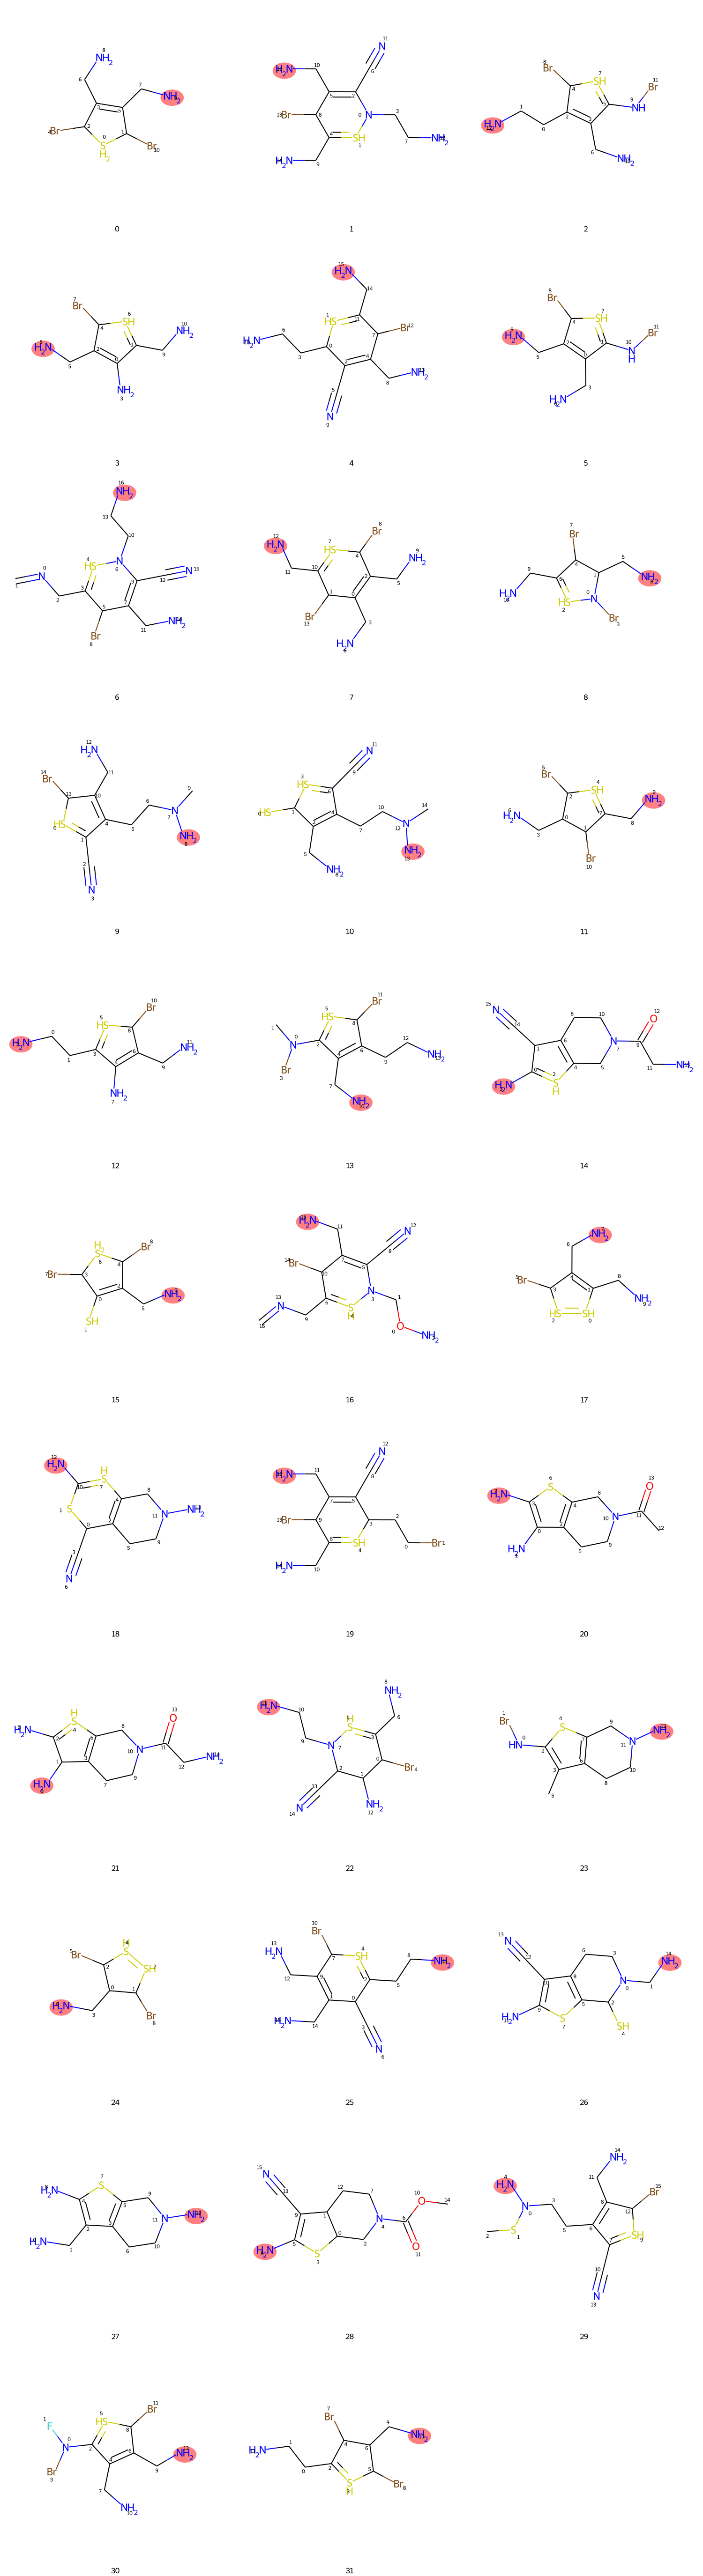

In [54]:
Draw.MolsToGridImage(mols,molsPerRow=3,maxMols=len(mols),legends=[str(x) for x in list_idx], subImgSize=(500,500), highlightAtomLists=cut_idx)

### Energy evolution through time

In [34]:
# Get gen paths
gen_objects = sorted(generation_path.rglob('*GA*'))

In [35]:
avg_energy=[]
for elem in gen_objects:
    with open(elem, "rb") as f:
        gen = pickle.load(f)
        avg_energy.append(gen.gen2pd()['score'].mean())

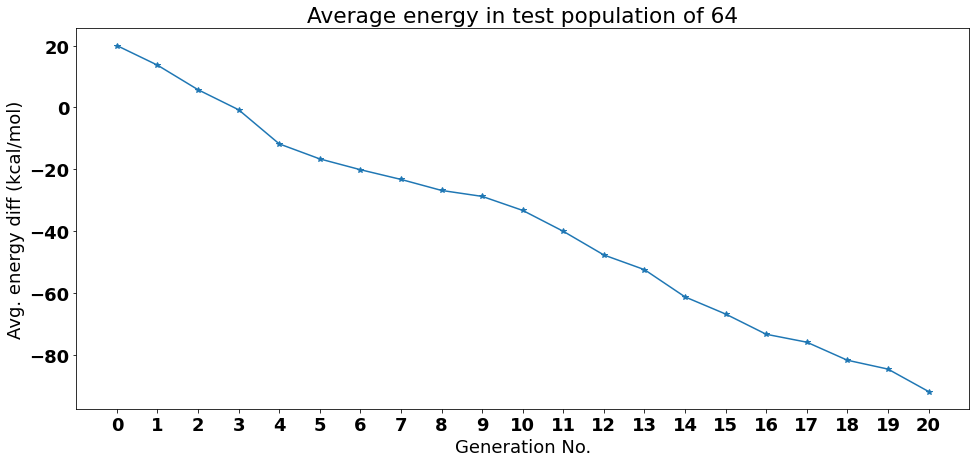

In [104]:
fig, ax = plt.subplots(figsize=(16, 7))
x = np.arange(0,len(avg_energy))
ax.plot(x,avg_energy,'*-')
ax.set(xlabel='Generation No.', ylabel='Avg. energy diff (kcal/mol)', title='Average energy in test population of 64',xticks=x);
fig.savefig('generation__64_avgenergy.png', dpi=600)

# Flexible amines 3 gen

In [32]:
templates = Path('../templates/')
generation_path = Path('~').expanduser()/"Documents/generation_data/generation_amine_rework_20"

In [33]:
files = generation_path.rglob('*xtbopt.xyz')
paths = sorted(files)

In [34]:
Mo_NH3_paths = [path for path in paths if 'Mo' in str(path.parents[1])] 
catalyst_paths = [path for path in paths if 'catalyst' in str(path.parents[1])] 

In [37]:
confs = catalyst_paths

def conf_viewer(idx):
    mol = confs[idx]
    gen = confs[idx].parts[-3].split('_')[0][1:]
    print(f'Generation : {gen}')
    return draw_generation(str(confs[idx]))

interact(conf_viewer, idx=IntSlider(min=0,max=len(confs)-1, step=1))
# 216, 
# 38 shows something along the lines of HIPT. 
# 54 is a larger one
# 260 water
# 266 weird one

interactive(children=(IntSlider(value=0, description='idx', max=298), Output()), _dom_classes=('widget-interac…

<function __main__.conf_viewer(idx)>

In [38]:
confs = Mo_NH3_paths
interact(conf_viewer, idx=IntSlider(min=0,max=len(confs)-1, step=1))
#12


interactive(children=(IntSlider(value=0, description='idx', max=223), Output()), _dom_classes=('widget-interac…

<function __main__.conf_viewer(idx)>

## Final generation analysis

### What where the molecules in final generation? 

In [39]:
[path for path in paths if '/002_' in str(path.parents[1])] 

[PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_000_Mo_NH3/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_000_catalyst/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_001_Mo_NH3/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_001_catalyst/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_002_catalyst/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_003_Mo_NH3/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_003_catalyst/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rework_20/002_004_Mo_NH3/conf000/xtbopt.xyz'),
 PosixPath('/home/magstr/Documents/generation_data/generation_amine_rewo

In [40]:
final_gen_mo_nh3 = [path for path in paths if '/002_' in str(path.parents[1])] 

In [41]:
confs = final_gen_mo_nh3
interact(conf_viewer, idx=IntSlider(min=0,max=len(confs)-1, step=1))

interactive(children=(IntSlider(value=0, description='idx', max=26), Output()), _dom_classes=('widget-interact…

<function __main__.conf_viewer(idx)>

### The best ones from final generation

In [134]:
generation_path

PosixPath('/home/magstr/generation_correct_scoring')

In [135]:
with open(generation_path/'GA20.pkl', "rb") as f:
    gen20 = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/home/magstr/generation_correct_scoring/GA20.pkl'

In [45]:
#gen20.gen2pd()

In [46]:
mols = []
idx = []
for elem in gen20.survivors.molecules:
    mols.append(Chem.MolFromSmiles(elem.smiles))
    idx.append(elem.idx[1])

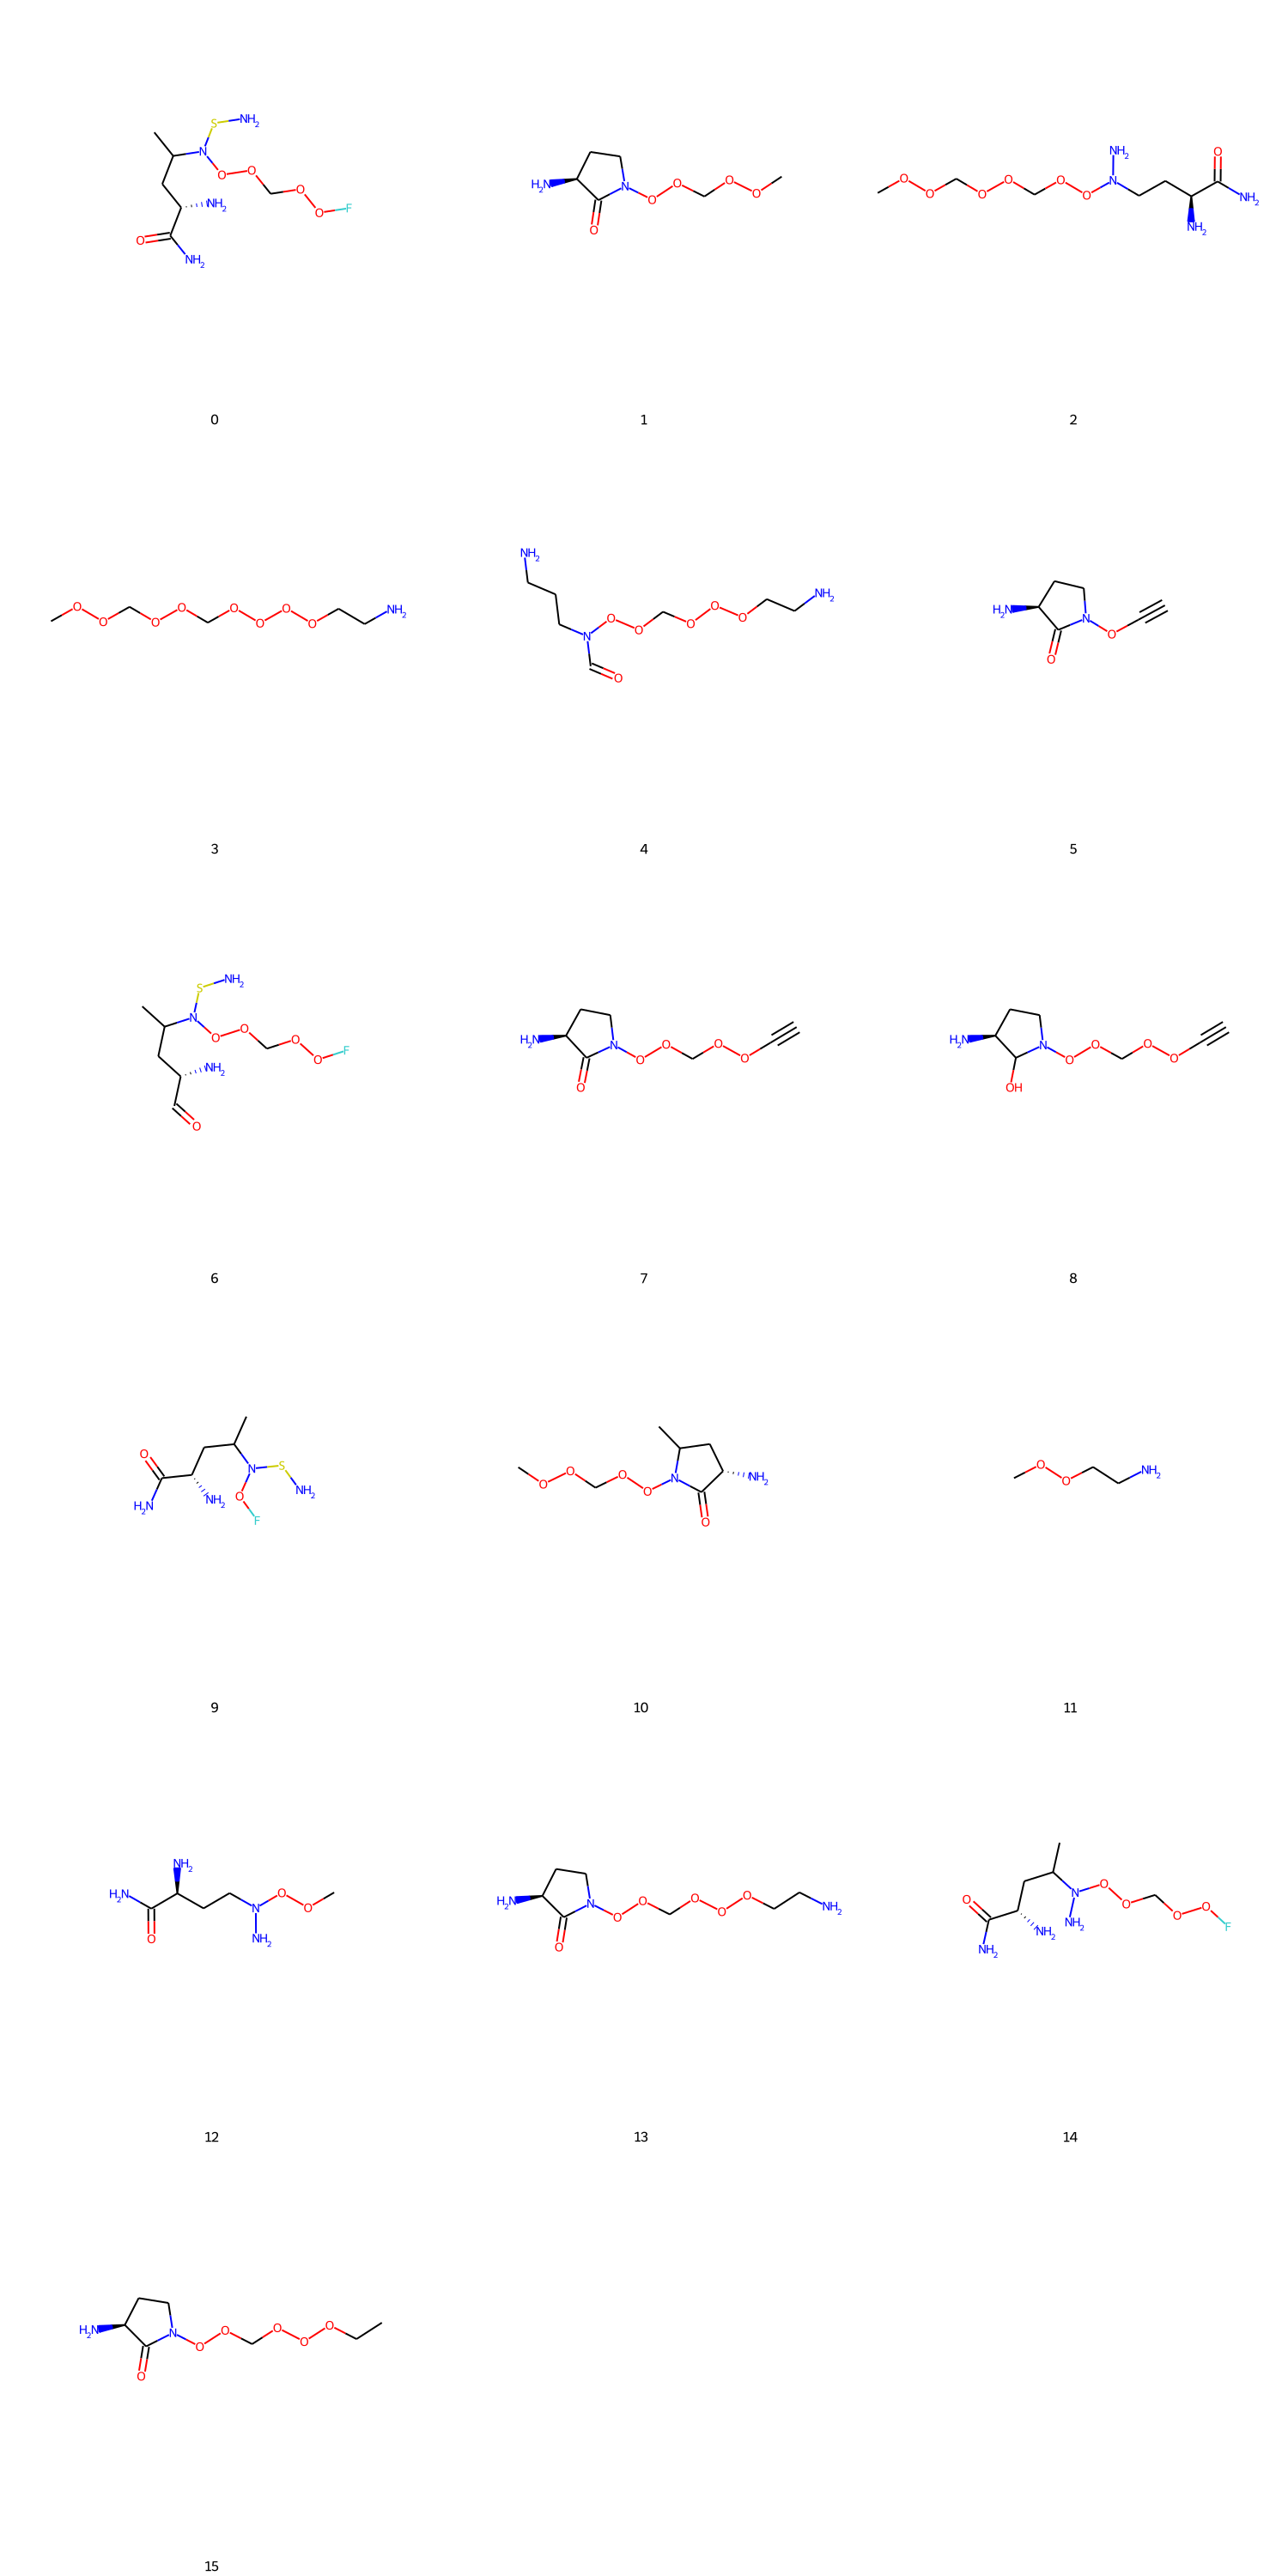

In [47]:
Draw.MolsToGridImage(mols,molsPerRow=3,maxMols=20,legends=[str(x) for x in idx], subImgSize=(500,500))

### Energy evolution through generation